In [11]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import random
import math 


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

# 1. Haar-like 얼굴 검출

In [42]:
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

src = cv2.imread('kids.png')

faces = classifier.detectMultiScale(src,1.1,3)#scale factor and minNeighbors
print(faces)

[[504 145 126 126]
 [113 158 112 112]]


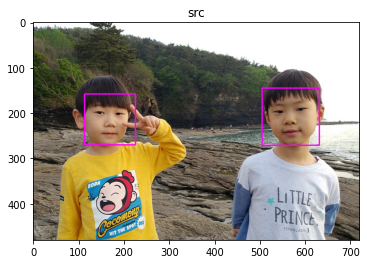

In [43]:
for (x, y, w, h) in faces:
        cv2.rectangle(src, (x, y), (x + w, y + h), (255, 0, 255), 2)

imshow('src', src)

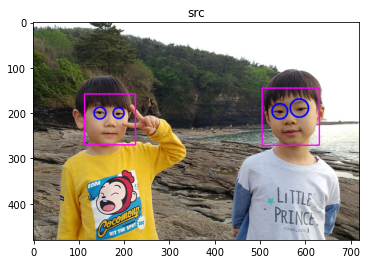

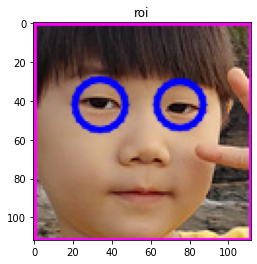

In [10]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')


src = cv2.imread('kids.png')

faces = face_classifier.detectMultiScale(src)

for (x1, y1, w1, h1) in faces:
        cv2.rectangle(src, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 255), 2)

        faceROI = src[y1:y1 + h1, x1:x1 + w1]
        eyes = eye_classifier.detectMultiScale(faceROI)

        for (x2, y2, w2, h2) in eyes:
            center = (int(x2 + w2 / 2), int(y2 + h2 / 2))
            cv2.circle(faceROI, center, int(w2 / 2), (255, 0, 0), 2, cv2.LINE_AA)
             #cause we didn't copy src to faceROI, so what we apply on
            # faceROI willbe applied to src
imshow('src', src); plt.show()
imshow("roi", faceROI)

# 2. HoG 기반 보행자 검출

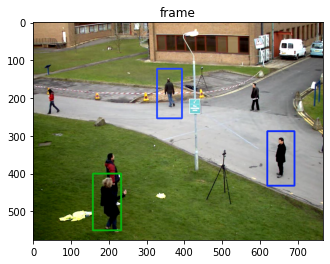

In [4]:
frame = cv2.imread('vtest.png')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

detected, _ = hog.detectMultiScale(frame)

for (x, y, w, h) in detected:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)

imshow('frame', frame)

In [22]:
cap = cv2.VideoCapture('vtest.avi')

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()

    if not ret:
        break

    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)

    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()

# QR 코드

In [2]:
detector = cv2.QRCodeDetector()

#frame = cv2.imread('qrcode.png')
frame = cv2.imread('qrcode1.png')
info, points, _ = detector.detectAndDecode(frame)

print(info)
print(points)#3차 

https://www.instagram.com/valentin_bajeneza/?hl=en
[[[ 13.  13.]
  [186.  13.]
  [186. 186.]
  [ 13. 186.]]]


[[ 13  13]
 [186  13]
 [186 186]
 [ 13 186]]
https://www.instagram.com/valentin_bajeneza/?hl=en


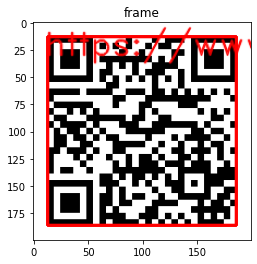

In [3]:
points = np.array(points, dtype=np.int32).reshape(4, 2)
print(points)

cv2.polylines(frame, [points], True, (0, 0, 255), 2)

print(info)

cv2.putText(frame, info, (10, 30), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), lineType=cv2.LINE_AA)

imshow('frame', frame)

In [9]:
import webbrowser

url = info #url read from detected Qrcode

# Open URL in a new tab, if a browser window is already open.
webbrowser.open_new_tab(url)

# Open URL in new window, raising the window if possible.
#webbrowser.open_new(url)

True